# **LOADING DATASET IN PYTHON**

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialize an empty list to store the image data
image_data_list = []

# Loop through the images and convert them to NumPy arrays
for i in range(31):
  # Construct the file name for the current image
  image_file = f'/content/drive/MyDrive/balloons_ms/balloons_ms/balloons_ms_{i+1:02d}.png'

  # Open the image and convert it to a NumPy array
  image = Image.open(image_file)
  image_data = np.array(image)

  # Append the image data to the list
  image_data_list.append(image_data)

# Stack the image data into a 3D array
image_data = np.stack(image_data_list, axis=2)


In [3]:
image_data.shape

(512, 512, 31)

# **GROUND TRUTH DATASET**

In [4]:

import tensorflow as tf
from tensorflow.keras import layers

gt_data=[]

for j in range(15):

  for i in range(15):
    if j==0 & i==0:
      gt_dataset=image_data[0:63,0:63,0:31]

  # Extract a ROI from the image
    gt_dataset=image_data[j*32:j*32+64,i*32:i*32+64,0:31]
    gt_data.append(gt_dataset)
# Stack the image data into a 3D array
gt_dataset = np.stack(gt_data, axis=2)
for i in range(15):

  for j in range(15):
    if j==0 & i==0:
      gt_dataset=image_data[0:63,0:63,0:31]

  # Extract a ROI from the image
    gt_dataset=image_data[j*32:j*32+64,i*32:i*32+64,0:31]
    gt_data.append(gt_dataset)
# Stack the image data into a 3D array
gt_dataset = np.stack(gt_data, axis=2)


In [5]:
gt_dataset.shape

(64, 64, 450, 31)

In [6]:
image_transposed = np.transpose(gt_dataset, (2, 0, 1, 3))

In [7]:
image_transposed.shape

(450, 64, 64, 31)

In [8]:
image_transposed[1].shape

(64, 64, 31)

# **HI RESOLUTION RGB**

In [9]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layer
input_layer = layers.Input(shape=(64, 64, 31))

# Define the convolutional layer
conv_layer = layers.Conv2D(3, kernel_size=3, padding='same', activation='relu')(input_layer)

# Define the model
model = tf.keras.Model(input_layer, conv_layer)

# Compile the model
HR_RGB = model.predict(image_transposed)

15/15 [==============================] - 1s 76ms/step


In [10]:
HR_RGB.shape

(450, 64, 64, 3)

In [11]:
HR_RGB[0].shape

(64, 64, 3)

# **LOW RESOLUTION HYPER-SPECTRAL IMAGES**

In [12]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layer
input_layer = layers.Input(shape=(64, 64, 31))

# Define the convolutional layer
conv_layer = layers.Conv2D(31, kernel_size=3, strides=8, padding='same', activation='relu')(input_layer)

# Define the model
model = tf.keras.Model(input_layer, conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
LRHSI = model.predict(image_transposed)

15/15 [==============================] - 0s 13ms/step


In [14]:
LRHSI[0].shape


(8, 8, 31)

In [15]:
LRHSI.shape

(450, 8, 8, 31)

# **CNN MODEL WITH ACCURACY 80% AND LOSS OF 600 IN 29_12_2022**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
# Upsample the second input image
upsampled = layers.UpSampling2D(size=8)(input_layer2)
# Combine the two input images using a convolutional layer
combined = layers.Conv2D(31, kernel_size=1, activation='relu')(upsampled)
# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(combined)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
conv2 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
conv3 = layers.Conv2D(64, kernel_size=1, activation='relu')(pool2)
pool3 = layers.MaxPooling2D(pool_size=(1, 1))(conv3)
# Define the output layer as a convolutional layer with 31 filters
output_layer = layers.Conv2D(31, kernel_size=1, activation='relu')(pool3)
# Define the model
modelnew = tf.keras.Model([input_layer1, input_layer2], output_layer)
# Compile the model
modelnew.compile(optimizer='adam',
loss='mean_absolute_error',
metrics=['accuracy'])
# Train the model and store the history object
history = modelnew.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=None, validation_split=0.2)

Epoch 1/1000
12/12 [==============================] - 1s 72ms/step - loss: 8055.1001 - accuracy: 0.0070 - val_loss: 5033.2876 - val_accuracy: 0.0042
Epoch 2/1000
12/12 [==============================] - 0s 33ms/step - loss: 6256.4224 - accuracy: 0.1151 - val_loss: 4408.1016 - val_accuracy: 0.0176
Epoch 3/1000
12/12 [==============================] - 0s 32ms/step - loss: 5378.1714 - accuracy: 0.1005 - val_loss: 3716.5496 - val_accuracy: 0.1889
Epoch 4/1000
12/12 [==============================] - 0s 34ms/step - loss: 4504.7964 - accuracy: 0.2148 - val_loss: 3439.0798 - val_accuracy: 0.2175
Epoch 5/1000
12/12 [==============================] - 0s 31ms/step - loss: 3918.5063 - accuracy: 0.2364 - val_loss: 2963.4661 - val_accuracy: 0.0236
Epoch 6/1000
12/12 [==============================] - 0s 32ms/step - loss: 3378.1860 - accuracy: 0.0961 - val_loss: 2614.8372 - val_accuracy: 0.1838
Epoch 7/1000
12/12 [==============================] - 0s 31ms/step - loss: 3016.4175 - accuracy: 0.2494 - 

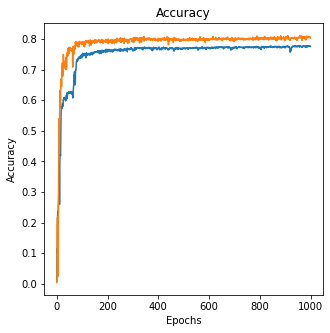

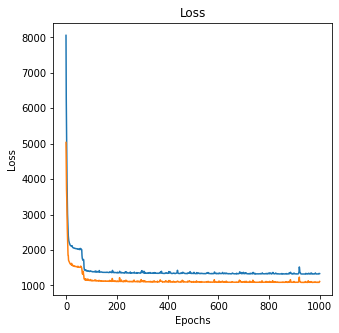

In [ ]:

# Extract the accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the first graph in the first subplot
fig = plt.figure(figsize=(5, 5))
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot the second graph in the second subplot
fig = plt.figure(figsize=(5, 5))
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
# Upsample the second input image
upsampled = layers.UpSampling2D(size=8)(input_layer2)
# Combine the two input images using a convolutional layer
combined = layers.Conv2D(31, kernel_size=1, activation='relu')(upsampled)
# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(combined)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
conv2 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
#conv3 = layers.Conv2D(64, kernel_size=1, activation='relu')(pool2)
#pool3 = layers.MaxPooling2D(pool_size=(1, 1))(conv3)
# Define the output layer as a convolutional layer with 31 filters
output_layer = layers.Conv2D(31, kernel_size=1, activation='relu')(pool2)
# Define the model
modelnew = tf.keras.Model([input_layer1, input_layer2], output_layer)
# Compile the model
modelnew.compile(optimizer='adam',
loss='mean_absolute_error',
metrics=['accuracy'])
# Train the model and store the history object
history = modelnew.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=None, validation_split=0.2)

Epoch 1/1000
12/12 [==============================] - 1s 48ms/step - loss: 8670.0576 - accuracy: 0.0201 - val_loss: 5416.9541 - val_accuracy: 0.0027
Epoch 2/1000
12/12 [==============================] - 0s 27ms/step - loss: 6072.5415 - accuracy: 0.0333 - val_loss: 4367.8940 - val_accuracy: 0.0036
Epoch 3/1000
12/12 [==============================] - 0s 29ms/step - loss: 4640.7524 - accuracy: 0.0238 - val_loss: 3373.9226 - val_accuracy: 0.0045
Epoch 4/1000
12/12 [==============================] - 0s 27ms/step - loss: 3863.6816 - accuracy: 0.0034 - val_loss: 2537.7271 - val_accuracy: 0.0046
Epoch 5/1000
12/12 [==============================] - 0s 28ms/step - loss: 3060.4277 - accuracy: 0.0664 - val_loss: 2253.0215 - val_accuracy: 0.0322
Epoch 6/1000
12/12 [==============================] - 0s 26ms/step - loss: 2716.2256 - accuracy: 0.1877 - val_loss: 1965.8236 - val_accuracy: 0.1806
Epoch 7/1000
12/12 [==============================] - 0s 28ms/step - loss: 2501.8606 - accuracy: 0.3089 - 

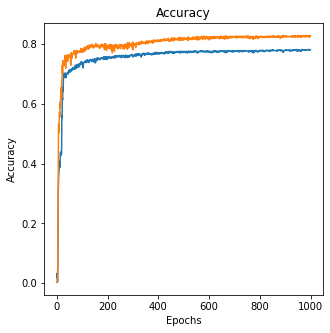

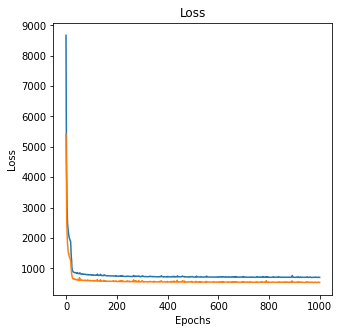

In [ ]:
# Extract the accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the first graph in the first subplot
fig = plt.figure(figsize=(5, 5))
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot the second graph in the second subplot
fig = plt.figure(figsize=(5, 5))
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
# Upsample the second input image
upsampled = layers.UpSampling2D(size=8)(input_layer2)
# Combine the two input images using a convolutional layer
combined = layers.Conv2D(31, kernel_size=1, activation='relu')(upsampled)
# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(combined)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
conv2 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
#conv3 = layers.Conv2D(64, kernel_size=1, activation='relu')(pool2)
#pool3 = layers.MaxPooling2D(pool_size=(1, 1))(conv3)
# Define the output layer as a convolutional layer with 31 filters
output_layer = layers.Conv2D(31, kernel_size=1, activation='relu')(pool2)
# Define the model
modelnew = tf.keras.Model([input_layer1, input_layer2], output_layer)
# Compile the model
modelnew.compile(optimizer='adam',
loss='mean_absolute_error',
metrics=['accuracy'])
# Train the model and store the history object
history = modelnew.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=None, validation_split=0.2)

Epoch 1/1000
12/12 [==============================] - 1s 43ms/step - loss: 8999.3369 - accuracy: 0.1269 - val_loss: 6384.4287 - val_accuracy: 0.0052
Epoch 2/1000
12/12 [==============================] - 0s 23ms/step - loss: 7598.2627 - accuracy: 0.1273 - val_loss: 5270.9937 - val_accuracy: 0.0043
Epoch 3/1000
12/12 [==============================] - 0s 23ms/step - loss: 6529.5312 - accuracy: 0.0912 - val_loss: 4892.1494 - val_accuracy: 0.0067
Epoch 4/1000
12/12 [==============================] - 0s 25ms/step - loss: 5769.7363 - accuracy: 0.0425 - val_loss: 4218.0933 - val_accuracy: 0.0136
Epoch 5/1000
12/12 [==============================] - 0s 25ms/step - loss: 5101.8047 - accuracy: 0.0430 - val_loss: 3737.3274 - val_accuracy: 0.1145
Epoch 6/1000
12/12 [==============================] - 0s 23ms/step - loss: 4513.3267 - accuracy: 0.1104 - val_loss: 3373.8928 - val_accuracy: 0.2379
Epoch 7/1000
12/12 [==============================] - 0s 22ms/step - loss: 3954.6655 - accuracy: 0.3950 - 

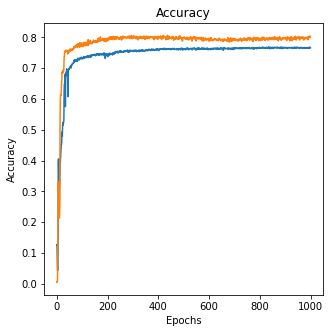

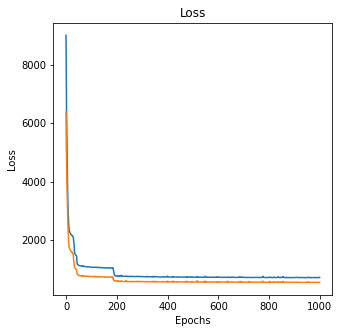

In [ ]:
# Extract the accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the first graph in the first subplot
fig = plt.figure(figsize=(5, 5))
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot the second graph in the second subplot
fig = plt.figure(figsize=(5, 5))
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
# Upsample the second input image
upsampled = layers.UpSampling2D(size=8)(input_layer2)
# Combine the two input images using a convolutional layer
combined = layers.Conv2D(31, kernel_size=1, activation='relu')(upsampled)
# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(128, kernel_size=1, activation='relu')(combined)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
conv2 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
#conv3 = layers.Conv2D(64, kernel_size=1, activation='relu')(pool2)
#pool3 = layers.MaxPooling2D(pool_size=(1, 1))(conv3)
# Define the output layer as a convolutional layer with 31 filters
output_layer = layers.Conv2D(31, kernel_size=1, activation='relu')(pool2)
# Define the model
modelnew = tf.keras.Model([input_layer1, input_layer2], output_layer)
# Compile the model
modelnew.compile(optimizer='adam',
loss='mean_absolute_error',
metrics=['accuracy'])
# Train the model and store the history object
history = modelnew.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=None, validation_split=0.2)

Epoch 1/1000
12/12 [==============================] - 1s 48ms/step - loss: 8947.4902 - accuracy: 0.0432 - val_loss: 6212.2568 - val_accuracy: 2.3058e-04
Epoch 2/1000
12/12 [==============================] - 0s 28ms/step - loss: 7208.3828 - accuracy: 0.0079 - val_loss: 5868.0312 - val_accuracy: 5.3711e-04
Epoch 3/1000
12/12 [==============================] - 0s 27ms/step - loss: 6080.8027 - accuracy: 0.0029 - val_loss: 5012.7109 - val_accuracy: 0.0043
Epoch 4/1000
12/12 [==============================] - 0s 25ms/step - loss: 5026.2490 - accuracy: 0.0033 - val_loss: 4318.7075 - val_accuracy: 0.0052
Epoch 5/1000
12/12 [==============================] - 0s 26ms/step - loss: 4178.8877 - accuracy: 0.0050 - val_loss: 3542.8728 - val_accuracy: 0.1587
Epoch 6/1000
12/12 [==============================] - 0s 25ms/step - loss: 3545.1611 - accuracy: 0.1980 - val_loss: 2958.1323 - val_accuracy: 0.1850
Epoch 7/1000
12/12 [==============================] - 0s 26ms/step - loss: 2990.0674 - accuracy: 0

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
# Upsample the second input image
upsampled = layers.UpSampling2D(size=8)(input_layer2)
# Combine the two input images using a convolutional layer
combined = layers.Conv2D(31, kernel_size=1, activation='relu')(upsampled)
# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(128, kernel_size=1, activation='relu')(combined)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
#conv2 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool1)
#pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
#conv3 = layers.Conv2D(64, kernel_size=1, activation='relu')(pool2)
#pool3 = layers.MaxPooling2D(pool_size=(1, 1))(conv3)
# Define the output layer as a convolutional layer with 31 filters
output_layer = layers.Conv2D(31, kernel_size=1, activation='relu')(pool1)
# Define the model
modelnew = tf.keras.Model([input_layer1, input_layer2], output_layer)
# Compile the model
modelnew.compile(optimizer='adam',
loss='mean_absolute_error',
metrics=['accuracy'])
# Train the model and store the history object
history = modelnew.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=None, validation_split=0.2)

Epoch 1/1000
12/12 [==============================] - 1s 42ms/step - loss: 8396.3613 - accuracy: 0.0938 - val_loss: 5614.2480 - val_accuracy: 0.1698
Epoch 2/1000
12/12 [==============================] - 0s 25ms/step - loss: 6329.8174 - accuracy: 0.1908 - val_loss: 4332.3721 - val_accuracy: 0.1774
Epoch 3/1000
12/12 [==============================] - 0s 23ms/step - loss: 4855.6240 - accuracy: 0.1373 - val_loss: 3166.6174 - val_accuracy: 0.2920
Epoch 4/1000
12/12 [==============================] - 0s 24ms/step - loss: 3917.7681 - accuracy: 0.1955 - val_loss: 2653.8518 - val_accuracy: 0.3579
Epoch 5/1000
12/12 [==============================] - 0s 25ms/step - loss: 3334.2678 - accuracy: 0.1663 - val_loss: 2592.3169 - val_accuracy: 0.3772
Epoch 6/1000
12/12 [==============================] - 0s 25ms/step - loss: 3078.0518 - accuracy: 0.1297 - val_loss: 2297.9985 - val_accuracy: 0.4274
Epoch 7/1000
12/12 [==============================] - 0s 25ms/step - loss: 2790.8369 - accuracy: 0.3552 - 

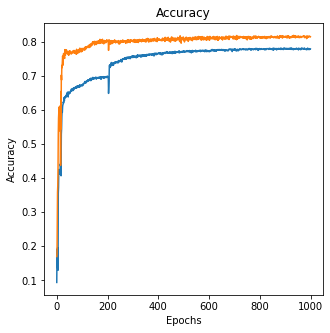

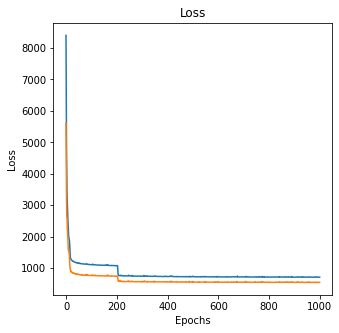

In [ ]:
# Extract the accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the first graph in the first subplot
fig = plt.figure(figsize=(5, 5))
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot the second graph in the second subplot
fig = plt.figure(figsize=(5, 5))
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
# Upsample the second input image
upsampled = layers.UpSampling2D(size=8)(input_layer2)
# Combine the two input images using a convolutional layer
combined = layers.Conv2D(31, kernel_size=1, activation='relu')(upsampled)
# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(combined)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
conv2 = layers.Conv2D(64, kernel_size=1, activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
#conv3 = layers.Conv2D(64, kernel_size=1, activation='relu')(pool2)
#pool3 = layers.MaxPooling2D(pool_size=(1, 1))(conv3)
# Define the output layer as a convolutional layer with 31 filters
output_layer = layers.Conv2D(31, kernel_size=1, activation='relu')(pool2)
# Define the model
modelnew = tf.keras.Model([input_layer1, input_layer2], output_layer)
# Compile the model
modelnew.compile(optimizer='adam',
loss='mean_absolute_error',
metrics=['accuracy'])
# Train the model and store the history object
history = modelnew.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=None, validation_split=0.2)

Epoch 1/1000
12/12 [==============================] - 1s 45ms/step - loss: 8505.1357 - accuracy: 0.0060 - val_loss: 5447.0801 - val_accuracy: 0.0044
Epoch 2/1000
12/12 [==============================] - 0s 26ms/step - loss: 6138.0791 - accuracy: 0.0116 - val_loss: 4114.6748 - val_accuracy: 0.0303
Epoch 3/1000
12/12 [==============================] - 0s 24ms/step - loss: 4974.9863 - accuracy: 0.0318 - val_loss: 3511.6677 - val_accuracy: 0.0897
Epoch 4/1000
12/12 [==============================] - 0s 24ms/step - loss: 4223.0000 - accuracy: 0.0640 - val_loss: 3141.6250 - val_accuracy: 0.1144
Epoch 5/1000
12/12 [==============================] - 0s 26ms/step - loss: 3598.3706 - accuracy: 0.1163 - val_loss: 2598.6692 - val_accuracy: 0.0445
Epoch 6/1000
12/12 [==============================] - 0s 23ms/step - loss: 3231.6848 - accuracy: 0.1576 - val_loss: 2442.7312 - val_accuracy: 0.3598
Epoch 7/1000
12/12 [==============================] - 0s 23ms/step - loss: 3020.7395 - accuracy: 0.3098 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the second input image
upsampled = layers.UpSampling2D(size=8)(input_layer2)

# Concatenate the two input images
concatenated = layers.Concatenate()([input_layer1, upsampled])

# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(concatenated)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
conv2 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
#conv3 = layers.Conv2D(64, kernel_size=1, activation='relu')(pool2)
#pool3 = layers.MaxPooling2D(pool_size=(1, 1))(conv3)

# Define the output layer as a convolutional layer with 31 filters
output_layer = layers.Conv2D(31, kernel_size=1, activation='relu')(pool2)

# Define the model
modelnew = tf.keras.Model([input_layer1, input_layer2], output_layer)

# Compile the model
modelnew.compile(optimizer='adam',
loss='mean_absolute_error',
metrics=['accuracy'])

# Train the model and store the history object
history = modelnew.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=None, validation_split=0.2)


Epoch 1/1000
12/12 [==============================] - 1s 50ms/step - loss: 8205.8887 - accuracy: 0.1756 - val_loss: 5133.1982 - val_accuracy: 0.4311
Epoch 2/1000
12/12 [==============================] - 0s 26ms/step - loss: 5697.8594 - accuracy: 0.1856 - val_loss: 3845.3735 - val_accuracy: 0.0637
Epoch 3/1000
12/12 [==============================] - 0s 27ms/step - loss: 3660.8098 - accuracy: 0.0735 - val_loss: 2418.3186 - val_accuracy: 0.0130
Epoch 4/1000
12/12 [==============================] - 0s 28ms/step - loss: 2599.0193 - accuracy: 0.0389 - val_loss: 2033.6927 - val_accuracy: 0.4663
Epoch 5/1000
12/12 [==============================] - 0s 29ms/step - loss: 2073.4456 - accuracy: 0.3346 - val_loss: 1557.4309 - val_accuracy: 0.5234
Epoch 6/1000
12/12 [==============================] - 0s 27ms/step - loss: 1601.0797 - accuracy: 0.3709 - val_loss: 1193.1044 - val_accuracy: 0.5077
Epoch 7/1000
12/12 [==============================] - 0s 26ms/step - loss: 1377.4703 - accuracy: 0.2665 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the second input image
upsampled = layers.UpSampling2D(size=8)(input_layer2)

# Concatenate the two input images
concatenated = layers.Concatenate()([input_layer1, upsampled])

# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(concatenated)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
#conv2 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool1)
#pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
#conv3 = layers.Conv2D(64, kernel_size=1, activation='relu')(pool2)
#pool3 = layers.MaxPooling2D(pool_size=(1, 1))(conv3)

# Define the output layer as a convolutional layer with 31 filters
output_layer = layers.Conv2D(31, kernel_size=1, activation='relu')(pool1)

# Define the model
modelnew = tf.keras.Model([input_layer1, input_layer2], output_layer)

# Compile the model
modelnew.compile(optimizer='adam',
loss='mean_absolute_error',
metrics=['accuracy'])

# Train the model and store the history object
history = modelnew.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=None, validation_split=0.2)


Epoch 1/1000
12/12 [==============================] - 1s 37ms/step - loss: 8343.4209 - accuracy: 0.0283 - val_loss: 6061.4609 - val_accuracy: 0.1079
Epoch 2/1000
12/12 [==============================] - 0s 24ms/step - loss: 7003.5488 - accuracy: 0.0296 - val_loss: 5137.4463 - val_accuracy: 0.1131
Epoch 3/1000
12/12 [==============================] - 0s 21ms/step - loss: 5521.0703 - accuracy: 0.0332 - val_loss: 4125.4634 - val_accuracy: 0.1174
Epoch 4/1000
12/12 [==============================] - 0s 22ms/step - loss: 4140.3828 - accuracy: 0.0488 - val_loss: 3077.7732 - val_accuracy: 0.1691
Epoch 5/1000
12/12 [==============================] - 0s 22ms/step - loss: 3300.4302 - accuracy: 0.1599 - val_loss: 2599.3997 - val_accuracy: 0.2219
Epoch 6/1000
12/12 [==============================] - 0s 21ms/step - loss: 2745.5596 - accuracy: 0.2058 - val_loss: 2132.1753 - val_accuracy: 0.2344
Epoch 7/1000
12/12 [==============================] - 0s 21ms/step - loss: 2247.0471 - accuracy: 0.2179 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
upsample1 = layers.UpSampling2D(size=1)(input_layer1)

# Define the convolutional layer
conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample1)
# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer1)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
conv2 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
conv3 = layers.Conv2D(64, kernel_size=1, activation='relu')(pool2)
pool3 = layers.MaxPooling2D(pool_size=(1, 1))(conv3)
# Define the output layer as a convolutional layer with 31 filters
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool3)

# Define the convolutional layer
#conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(input_layer1)
upsample = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample)
# Add more convolutional layers with increasing number of filters
conv4 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer2)
pool4 = layers.MaxPooling2D(pool_size=(1, 1))(conv4)
conv5 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool4)
pool5 = layers.MaxPooling2D(pool_size=(1, 1))(conv5)
conv6 = layers.Conv2D(64, kernel_size=1, activation='relu')(pool5)
pool6 = layers.MaxPooling2D(pool_size=(1, 1))(conv6)
# Define the output layer as a convolutional layer with 31 filters
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool6)
# Define the output layer
output_layer = layers.Add()([output_layer1, output_layer2 ])
# Define the model
model = tf.keras.Model([input_layer1, input_layer2], output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=32, validation_split=0.2)



Epoch 1/1000
12/12 [==============================] - 2s 76ms/step - loss: 8334.9824 - accuracy: 0.0150 - val_loss: 5622.1113 - val_accuracy: 0.0098
Epoch 2/1000
12/12 [==============================] - 1s 52ms/step - loss: 5744.4404 - accuracy: 0.0183 - val_loss: 4263.4238 - val_accuracy: 0.0112
Epoch 3/1000
12/12 [==============================] - 1s 51ms/step - loss: 4099.4106 - accuracy: 0.0360 - val_loss: 3163.2632 - val_accuracy: 0.0210
Epoch 4/1000
12/12 [==============================] - 1s 49ms/step - loss: 3380.2534 - accuracy: 0.0889 - val_loss: 2787.1758 - val_accuracy: 0.2930
Epoch 5/1000
12/12 [==============================] - 1s 50ms/step - loss: 2838.4998 - accuracy: 0.1042 - val_loss: 2179.8188 - val_accuracy: 0.3763
Epoch 6/1000
12/12 [==============================] - 1s 50ms/step - loss: 2336.9189 - accuracy: 0.1301 - val_loss: 1838.3257 - val_accuracy: 0.2991
Epoch 7/1000
12/12 [==============================] - 1s 50ms/step - loss: 1986.3640 - accuracy: 0.1796 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
upsample1 = layers.UpSampling2D(size=1)(input_layer1)

# Define the convolutional layer
conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample1)
# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer1)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
conv2 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
# Define the output layer as a convolutional layer with 31 filters
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool2)

# Define the convolutional layer
#conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(input_layer1)
upsample = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample)
# Add more convolutional layers with increasing number of filters
conv4 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer2)
pool4 = layers.MaxPooling2D(pool_size=(1, 1))(conv4)
conv5 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool4)
pool5 = layers.MaxPooling2D(pool_size=(1, 1))(conv5)
# Define the output layer as a convolutional layer with 31 filters
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool5)
# Define the output layer
output_layer = layers.Add()([output_layer1, output_layer2 ])
# Define the model
model = tf.keras.Model([input_layer1, input_layer2], output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=None, validation_split=0.2)



Epoch 1/1000
12/12 [==============================] - 1s 62ms/step - loss: 7336.6611 - accuracy: 0.0053 - val_loss: 4332.5396 - val_accuracy: 0.0018
Epoch 2/1000
12/12 [==============================] - 1s 43ms/step - loss: 4839.1943 - accuracy: 0.0661 - val_loss: 3089.6382 - val_accuracy: 0.3085
Epoch 3/1000
12/12 [==============================] - 1s 43ms/step - loss: 3614.6421 - accuracy: 0.1013 - val_loss: 2495.3254 - val_accuracy: 0.0570
Epoch 4/1000
12/12 [==============================] - 0s 41ms/step - loss: 2755.1128 - accuracy: 0.0600 - val_loss: 2200.3069 - val_accuracy: 0.2202
Epoch 5/1000
12/12 [==============================] - 1s 42ms/step - loss: 2218.6594 - accuracy: 0.2936 - val_loss: 1649.9731 - val_accuracy: 0.5607
Epoch 6/1000
12/12 [==============================] - 0s 42ms/step - loss: 1819.8262 - accuracy: 0.3101 - val_loss: 1326.4569 - val_accuracy: 0.4967
Epoch 7/1000
12/12 [==============================] - 1s 45ms/step - loss: 1583.9790 - accuracy: 0.3482 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
upsample1 = layers.UpSampling2D(size=1)(input_layer1)

# Define the convolutional layer
conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample1)
# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer1)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
conv2 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
# Define the output layer as a convolutional layer with 31 filters
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool2)

# Define the convolutional layer
#conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(input_layer1)
upsample = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample)
# Add more convolutional layers with increasing number of filters
conv4 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer2)
pool4 = layers.MaxPooling2D(pool_size=(1, 1))(conv4)
conv5 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool4)
pool5 = layers.MaxPooling2D(pool_size=(1, 1))(conv5)
# Define the output layer as a convolutional layer with 31 filters
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool5)
# Define the output layer
output_layer = layers.Add()([output_layer1, output_layer2 ])
# Define the model
model = tf.keras.Model([input_layer1, input_layer2], output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2)



Epoch 1/100
12/12 [==============================] - 1s 64ms/step - loss: 8473.9160 - accuracy: 0.0141 - val_loss: 5301.2915 - val_accuracy: 0.0171
Epoch 2/100
12/12 [==============================] - 1s 42ms/step - loss: 5824.8960 - accuracy: 0.0316 - val_loss: 3812.9812 - val_accuracy: 0.1134
Epoch 3/100
12/12 [==============================] - 1s 43ms/step - loss: 4111.6006 - accuracy: 0.0455 - val_loss: 2603.9600 - val_accuracy: 0.0404
Epoch 4/100
12/12 [==============================] - 1s 47ms/step - loss: 2819.6997 - accuracy: 0.0585 - val_loss: 2007.6395 - val_accuracy: 0.3687
Epoch 5/100
12/12 [==============================] - 1s 52ms/step - loss: 2015.6654 - accuracy: 0.1132 - val_loss: 1515.9672 - val_accuracy: 0.3946
Epoch 6/100
12/12 [==============================] - 1s 43ms/step - loss: 1559.6344 - accuracy: 0.1675 - val_loss: 1199.2958 - val_accuracy: 0.3388
Epoch 7/100
12/12 [==============================] - 1s 47ms/step - loss: 1354.0702 - accuracy: 0.3052 - val_los

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
upsample1 = layers.UpSampling2D(size=1)(input_layer1)

# Define the convolutional layer
conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample1)
# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer1)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
conv2 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
# Define the output layer as a convolutional layer with 31 filters
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool2)

# Define the convolutional layer
#conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(input_layer1)
upsample = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample)
# Add more convolutional layers with increasing number of filters
conv4 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer2)
pool4 = layers.MaxPooling2D(pool_size=(1, 1))(conv4)
conv5 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool4)
pool5 = layers.MaxPooling2D(pool_size=(1, 1))(conv5)
# Define the output layer as a convolutional layer with 31 filters
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool5)
# Define the output layer
output_layer = layers.Add()([output_layer1, output_layer2 ])
# Define the model
model = tf.keras.Model([input_layer1, input_layer2], output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=32, validation_split=0.2)



Epoch 1/1000
12/12 [==============================] - 2s 103ms/step - loss: 7980.8306 - accuracy: 0.0315 - val_loss: 4672.6118 - val_accuracy: 0.1187
Epoch 2/1000
12/12 [==============================] - 1s 51ms/step - loss: 5009.8433 - accuracy: 0.0481 - val_loss: 2920.9985 - val_accuracy: 0.2758
Epoch 3/1000
12/12 [==============================] - 1s 51ms/step - loss: 3359.0894 - accuracy: 0.1676 - val_loss: 2279.3511 - val_accuracy: 0.1771
Epoch 4/1000
12/12 [==============================] - 1s 54ms/step - loss: 2467.4495 - accuracy: 0.1931 - val_loss: 1825.0149 - val_accuracy: 0.0703
Epoch 5/1000
12/12 [==============================] - 1s 59ms/step - loss: 2009.4700 - accuracy: 0.2162 - val_loss: 1528.6261 - val_accuracy: 0.1928
Epoch 6/1000
12/12 [==============================] - 1s 52ms/step - loss: 1715.4910 - accuracy: 0.3498 - val_loss: 1357.0455 - val_accuracy: 0.2349
Epoch 7/1000
12/12 [==============================] - 1s 49ms/step - loss: 1532.6339 - accuracy: 0.3297 -

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
upsample1 = layers.UpSampling2D(size=1)(input_layer1)

# Define the convolutional layer
conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample1)
# Add more convolutional layers with increasing number of filters
conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer1)
pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
#conv2 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool1)
#pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
# Define the output layer as a convolutional layer with 31 filters
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool1)

# Define the convolutional layer
#conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(input_layer1)
upsample = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample)
# Add more convolutional layers with increasing number of filters
conv4 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer2)
pool4 = layers.MaxPooling2D(pool_size=(1, 1))(conv4)
#conv5 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool4)
#pool5 = layers.MaxPooling2D(pool_size=(1, 1))(conv5)
# Define the output layer as a convolutional layer with 31 filters
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(pool4)
# Define the output layer
output_layer = layers.Add()([output_layer1, output_layer2 ])
# Define the model
model = tf.keras.Model([input_layer1, input_layer2], output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2)



Epoch 1/100
12/12 [==============================] - 1s 49ms/step - loss: 8378.8906 - accuracy: 0.0183 - val_loss: 6011.7480 - val_accuracy: 0.0058
Epoch 2/100
12/12 [==============================] - 0s 30ms/step - loss: 6712.8682 - accuracy: 0.0183 - val_loss: 4914.2310 - val_accuracy: 0.0044
Epoch 3/100
12/12 [==============================] - 0s 29ms/step - loss: 5219.0054 - accuracy: 0.0627 - val_loss: 4186.1943 - val_accuracy: 0.0075
Epoch 4/100
12/12 [==============================] - 0s 29ms/step - loss: 4237.2812 - accuracy: 0.0201 - val_loss: 3603.6882 - val_accuracy: 0.0141
Epoch 5/100
12/12 [==============================] - 0s 28ms/step - loss: 3520.6104 - accuracy: 0.0681 - val_loss: 2966.2749 - val_accuracy: 0.0497
Epoch 6/100
12/12 [==============================] - 0s 28ms/step - loss: 2936.1086 - accuracy: 0.0595 - val_loss: 2458.1980 - val_accuracy: 0.0309
Epoch 7/100
12/12 [==============================] - 0s 29ms/step - loss: 2422.3650 - accuracy: 0.1251 - val_los

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
upsample1 = layers.UpSampling2D(size=1)(input_layer1)

# Define the convolutional layer
conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample1)
# Add more convolutional layers with increasing number of filters
#conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer1)
#pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
#conv2 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool1)
#pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
# Define the output layer as a convolutional layer with 31 filters
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Define the convolutional layer
#conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(input_layer1)
upsample = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample)
# Add more convolutional layers with increasing number of filters
#conv4 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer2)
#pool4 = layers.MaxPooling2D(pool_size=(1, 1))(conv4)
#conv5 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool4)
#pool5 = layers.MaxPooling2D(pool_size=(1, 1))(conv5)
# Define the output layer as a convolutional layer with 31 filters
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)
# Define the output layer
output_layer = layers.Add()([output_layer1, output_layer2 ])
# Define the model
model = tf.keras.Model([input_layer1, input_layer2], output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2)



Epoch 1/100
12/12 [==============================] - 1s 36ms/step - loss: 7570.9771 - accuracy: 0.0084 - val_loss: 5784.8579 - val_accuracy: 0.0034
Epoch 2/100
12/12 [==============================] - 0s 21ms/step - loss: 6668.8320 - accuracy: 0.0116 - val_loss: 5220.2529 - val_accuracy: 0.0017
Epoch 3/100
12/12 [==============================] - 0s 21ms/step - loss: 5834.9824 - accuracy: 0.0104 - val_loss: 4685.2505 - val_accuracy: 0.0036
Epoch 4/100
12/12 [==============================] - 0s 20ms/step - loss: 5035.6514 - accuracy: 0.0123 - val_loss: 4020.9688 - val_accuracy: 0.0126
Epoch 5/100
12/12 [==============================] - 0s 21ms/step - loss: 4252.8042 - accuracy: 0.0113 - val_loss: 3430.6367 - val_accuracy: 0.0167
Epoch 6/100
12/12 [==============================] - 0s 20ms/step - loss: 3621.6414 - accuracy: 0.0113 - val_loss: 2927.2805 - val_accuracy: 0.0214
Epoch 7/100
12/12 [==============================] - 0s 23ms/step - loss: 3139.8315 - accuracy: 0.0078 - val_los

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))
upsample1 = layers.UpSampling2D(size=1)(input_layer1)

# Define the convolutional layer
#conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample1)
# Add more convolutional layers with increasing number of filters
#conv1 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer1)
#pool1 = layers.MaxPooling2D(pool_size=(1, 1))(conv1)
#conv2 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool1)
#pool2 = layers.MaxPooling2D(pool_size=(1, 1))(conv2)
# Define the output layer as a convolutional layer with 31 filters
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample1)

# Define the convolutional layer
#conv_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(input_layer1)
upsample = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
#conv_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample)
# Add more convolutional layers with increasing number of filters
#conv4 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_layer2)
#pool4 = layers.MaxPooling2D(pool_size=(1, 1))(conv4)
#conv5 = layers.Conv2D(128, kernel_size=1, activation='relu')(pool4)
#pool5 = layers.MaxPooling2D(pool_size=(1, 1))(conv5)
# Define the output layer as a convolutional layer with 31 filters
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample)
# Define the output layer
output_layer = layers.Add()([output_layer1, output_layer2 ])
# Define the model
model = tf.keras.Model([input_layer1, input_layer2], output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2)



Epoch 1/100
12/12 [==============================] - 1s 34ms/step - loss: 7094.9150 - accuracy: 0.0064 - val_loss: 5836.2363 - val_accuracy: 0.0072
Epoch 2/100
12/12 [==============================] - 0s 21ms/step - loss: 6635.6396 - accuracy: 0.0303 - val_loss: 5498.8525 - val_accuracy: 0.1160
Epoch 3/100
12/12 [==============================] - 0s 21ms/step - loss: 6143.3169 - accuracy: 0.0850 - val_loss: 5144.0757 - val_accuracy: 0.3276
Epoch 4/100
12/12 [==============================] - 0s 19ms/step - loss: 5604.7627 - accuracy: 0.1138 - val_loss: 4779.7012 - val_accuracy: 0.3540
Epoch 5/100
12/12 [==============================] - 0s 19ms/step - loss: 5048.2920 - accuracy: 0.1182 - val_loss: 4382.3638 - val_accuracy: 0.3642
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 4449.4062 - accuracy: 0.1217 - val_loss: 3950.1997 - val_accuracy: 0.3660
Epoch 7/100
12/12 [==============================] - 0s 20ms/step - loss: 3930.4309 - accuracy: 0.1192 - val_los

# **chose best result model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

upsample = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Define the output layer
output_layer = layers.Add()([output_layer1, output_layer2 ])
# Define the model
model = tf.keras.Model([input_layer1, input_layer2], output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 51ms/step - loss: 7492.3647 - accuracy: 0.0089 - val_loss: 5103.8828 - val_accuracy: 0.0286
Epoch 2/100
12/12 [==============================] - 0s 33ms/step - loss: 6085.6377 - accuracy: 0.0152 - val_loss: 4066.1428 - val_accuracy: 0.0437
Epoch 3/100
12/12 [==============================] - 0s 24ms/step - loss: 4548.8335 - accuracy: 0.0953 - val_loss: 3078.2173 - val_accuracy: 0.3699
Epoch 4/100
12/12 [==============================] - 0s 23ms/step - loss: 3281.9014 - accuracy: 0.1510 - val_loss: 2355.2302 - val_accuracy: 0.4218
Epoch 5/100
12/12 [==============================] - 0s 24ms/step - loss: 2538.0691 - accuracy: 0.1369 - val_loss: 1861.1837 - val_accuracy: 0.3800
Epoch 6/100
12/12 [==============================] - 0s 23ms/step - loss: 2077.2971 - accuracy: 0.1807 - val_loss: 1584.0593 - val_accuracy: 0.3988
Epoch 7/100
12/12 [==============================] - 0s 24ms/step - loss: 1786.7731 - accuracy: 0.2258 - val_los

# **changes in best model results in good accuracy further**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated)

# Define the model
model = tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2)


Epoch 1/100
12/12 [==============================] - 1s 47ms/step - loss: 9015.2920 - accuracy: 0.0108 - val_loss: 6434.7471 - val_accuracy: 0.0270
Epoch 2/100
12/12 [==============================] - 0s 26ms/step - loss: 7698.9165 - accuracy: 0.0356 - val_loss: 5437.1763 - val_accuracy: 0.1158
Epoch 3/100
12/12 [==============================] - 0s 25ms/step - loss: 6388.4409 - accuracy: 0.0358 - val_loss: 4667.2422 - val_accuracy: 0.1163
Epoch 4/100
12/12 [==============================] - 0s 26ms/step - loss: 5330.7432 - accuracy: 0.0545 - val_loss: 3811.0042 - val_accuracy: 0.1128
Epoch 5/100
12/12 [==============================] - 0s 25ms/step - loss: 4120.4038 - accuracy: 0.0495 - val_loss: 3124.5527 - val_accuracy: 0.0529
Epoch 6/100
12/12 [==============================] - 0s 25ms/step - loss: 3317.0000 - accuracy: 0.1070 - val_loss: 2732.7810 - val_accuracy: 0.1077
Epoch 7/100
12/12 [==============================] - 0s 25ms/step - loss: 2836.0415 - accuracy: 0.1284 - val_los

# **further changes didn't improved accuracy**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
#upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(input_layer1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated)

# Define the model
model = tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2)


Epoch 1/100
12/12 [==============================] - 1s 44ms/step - loss: 9020.1914 - accuracy: 0.0038 - val_loss: 6582.3486 - val_accuracy: 8.9518e-04
Epoch 2/100
12/12 [==============================] - 0s 31ms/step - loss: 7681.2290 - accuracy: 0.0115 - val_loss: 5724.2363 - val_accuracy: 5.5067e-04
Epoch 3/100
12/12 [==============================] - 0s 28ms/step - loss: 6499.2666 - accuracy: 0.0096 - val_loss: 4983.2207 - val_accuracy: 4.2318e-04
Epoch 4/100
12/12 [==============================] - 0s 25ms/step - loss: 5519.1216 - accuracy: 0.0056 - val_loss: 3978.2222 - val_accuracy: 0.0073
Epoch 5/100
12/12 [==============================] - 0s 25ms/step - loss: 4697.6978 - accuracy: 0.0505 - val_loss: 3236.0945 - val_accuracy: 0.3952
Epoch 6/100
12/12 [==============================] - 0s 25ms/step - loss: 3955.9768 - accuracy: 0.1193 - val_loss: 2611.1912 - val_accuracy: 0.0911
Epoch 7/100
12/12 [==============================] - 0s 28ms/step - loss: 3204.9204 - accuracy: 0.07

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
#upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(input_layer1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated)

# Define the model
model = tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
12/12 [==============================] - 2s 68ms/step - loss: 8189.6548 - accuracy: 0.0017 - val_loss: 5442.4761 - val_accuracy: 2.0345e-04
Epoch 2/100
12/12 [==============================] - 1s 42ms/step - loss: 6495.2793 - accuracy: 0.0014 - val_loss: 4090.0132 - val_accuracy: 0.0015
Epoch 3/100
12/12 [==============================] - 0s 40ms/step - loss: 5210.4731 - accuracy: 0.0033 - val_loss: 3463.8577 - val_accuracy: 0.0111
Epoch 4/100
12/12 [==============================] - 0s 31ms/step - loss: 4061.3093 - accuracy: 0.0139 - val_loss: 2723.0181 - val_accuracy: 0.0222
Epoch 5/100
12/12 [==============================] - 0s 39ms/step - loss: 3049.5471 - accuracy: 0.0346 - val_loss: 2159.9426 - val_accuracy: 0.0280
Epoch 6/100
12/12 [==============================] - 0s 40ms/step - loss: 2409.0508 - accuracy: 0.0370 - val_loss: 1854.2448 - val_accuracy: 0.0315
Epoch 7/100
12/12 [==============================] - 1s 44ms/step - loss: 2067.4775 - accuracy: 0.1045 - val

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
#upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(input_layer1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated)

# Define the model
model = tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=64, validation_split=0.2)


Epoch 1/100
6/6 [==============================] - 1s 117ms/step - loss: 8554.9678 - accuracy: 0.0570 - val_loss: 6086.7725 - val_accuracy: 0.0372
Epoch 2/100
6/6 [==============================] - 0s 45ms/step - loss: 7581.4570 - accuracy: 0.0569 - val_loss: 5347.8047 - val_accuracy: 0.0370
Epoch 3/100
6/6 [==============================] - 0s 48ms/step - loss: 6592.8467 - accuracy: 0.0567 - val_loss: 4814.7319 - val_accuracy: 0.0372
Epoch 4/100
6/6 [==============================] - 0s 46ms/step - loss: 5699.9492 - accuracy: 0.0566 - val_loss: 4466.7979 - val_accuracy: 0.0373
Epoch 5/100
6/6 [==============================] - 0s 47ms/step - loss: 5075.6714 - accuracy: 0.0560 - val_loss: 4028.3281 - val_accuracy: 0.0350
Epoch 6/100
6/6 [==============================] - 0s 48ms/step - loss: 4501.9419 - accuracy: 0.0447 - val_loss: 3523.8923 - val_accuracy: 0.0025
Epoch 7/100
6/6 [==============================] - 0s 46ms/step - loss: 3878.8396 - accuracy: 0.0290 - val_loss: 3062.2236 

# **now increase epochs in the best model created above**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated)

# Define the model
model = tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=1000, batch_size=None, validation_split=0.2)


Epoch 1/1000
12/12 [==============================] - 1s 46ms/step - loss: 9016.2197 - accuracy: 0.0070 - val_loss: 6362.8599 - val_accuracy: 0.0157
Epoch 2/1000
12/12 [==============================] - 0s 26ms/step - loss: 7446.8994 - accuracy: 0.0071 - val_loss: 4861.0884 - val_accuracy: 0.0158
Epoch 3/1000
12/12 [==============================] - 0s 26ms/step - loss: 5627.5796 - accuracy: 0.0661 - val_loss: 4224.4951 - val_accuracy: 0.0107
Epoch 4/1000
12/12 [==============================] - 0s 26ms/step - loss: 4585.6616 - accuracy: 0.0478 - val_loss: 3573.6951 - val_accuracy: 0.0059
Epoch 5/1000
12/12 [==============================] - 0s 25ms/step - loss: 3770.9509 - accuracy: 0.0748 - val_loss: 2980.2979 - val_accuracy: 0.2936
Epoch 6/1000
12/12 [==============================] - 0s 28ms/step - loss: 3068.4468 - accuracy: 0.0894 - val_loss: 2423.1104 - val_accuracy: 0.1980
Epoch 7/1000
12/12 [==============================] - 0s 25ms/step - loss: 2494.5706 - accuracy: 0.0913 - 

# **increased sample per epoch and learning rate **

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated)

# Compile the model with a learning rate of 0.01 and 100 samples per epoch
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['accuracy'])

# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2, steps_per_epoch=50)

Epoch 1/100
50/50 [==============================] - 2s 17ms/step - loss: 790.0027 - accuracy: 0.7299 - val_loss: 544.1195 - val_accuracy: 0.7846
Epoch 2/100
50/50 [==============================] - 1s 10ms/step - loss: 686.8332 - accuracy: 0.7354 - val_loss: 526.5968 - val_accuracy: 0.7820
Epoch 3/100
50/50 [==============================] - 0s 9ms/step - loss: 659.8004 - accuracy: 0.7473 - val_loss: 571.0972 - val_accuracy: 0.7907
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 717.9963 - accuracy: 0.7327 - val_loss: 583.6807 - val_accuracy: 0.7856
Epoch 5/100
50/50 [==============================] - 0s 8ms/step - loss: 668.5257 - accuracy: 0.7457 - val_loss: 539.8849 - val_accuracy: 0.7902
Epoch 6/100
50/50 [==============================] - 0s 9ms/step - loss: 740.3493 - accuracy: 0.7197 - val_loss: 590.8100 - val_accuracy: 0.7878
Epoch 7/100
50/50 [==============================] - 0s 8ms/step - loss: 677.6529 - accuracy: 0.7486 - val_loss: 564.0380 - val_

50/50 [==============================] - 0s 3ms/step - loss: 679.5294 - accuracy: 0.7478 - val_loss: 536.6544 - val_accuracy: 0.7575


In [16]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated)
# Define the model
model= tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2, steps_per_epoch=20)

Epoch 1/100
20/20 [==============================] - 6s 254ms/step - loss: 4693.5112 - accuracy: 0.0300 - val_loss: 2040.8069 - val_accuracy: 0.0304
Epoch 2/100
20/20 [==============================] - 7s 374ms/step - loss: 1932.0203 - accuracy: 0.2292 - val_loss: 1092.1339 - val_accuracy: 0.5799
Epoch 3/100
20/20 [==============================] - 5s 255ms/step - loss: 1095.2444 - accuracy: 0.3012 - val_loss: 843.7597 - val_accuracy: 0.1752
Epoch 4/100
20/20 [==============================] - 6s 293ms/step - loss: 864.1552 - accuracy: 0.4530 - val_loss: 766.7911 - val_accuracy: 0.6314
Epoch 5/100
20/20 [==============================] - 6s 286ms/step - loss: 813.9224 - accuracy: 0.5423 - val_loss: 721.1735 - val_accuracy: 0.4594
Epoch 6/100
20/20 [==============================] - 7s 342ms/step - loss: 775.9106 - accuracy: 0.5905 - val_loss: 702.4385 - val_accuracy: 0.7237
Epoch 7/100
20/20 [==============================] - 7s 354ms/step - loss: 763.5760 - accuracy: 0.6085 - val_loss

# **with learning rate 0.1, the model overshoots from the global optima**

In [17]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated)
# Define the model
model= tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2, steps_per_epoch=20)

Epoch 1/100
20/20 [==============================] - 6s 264ms/step - loss: 8738.4727 - accuracy: 0.0540 - val_loss: 1892.9401 - val_accuracy: 0.4263
Epoch 2/100
20/20 [==============================] - 5s 257ms/step - loss: 1940.7751 - accuracy: 0.1391 - val_loss: 1421.0621 - val_accuracy: 0.1803
Epoch 3/100
20/20 [==============================] - 5s 257ms/step - loss: 1693.4133 - accuracy: 0.1580 - val_loss: 1652.3605 - val_accuracy: 0.3856
Epoch 4/100
20/20 [==============================] - 5s 257ms/step - loss: 1637.1183 - accuracy: 0.1474 - val_loss: 1121.9795 - val_accuracy: 0.4570
Epoch 5/100
20/20 [==============================] - 5s 257ms/step - loss: 1600.9091 - accuracy: 0.3346 - val_loss: 1113.8318 - val_accuracy: 0.6455
Epoch 6/100
20/20 [==============================] - 5s 255ms/step - loss: 1485.3262 - accuracy: 0.3246 - val_loss: 923.4911 - val_accuracy: 0.4205
Epoch 7/100
20/20 [==============================] - 5s 256ms/step - loss: 1358.0259 - accuracy: 0.3448 - v

In [19]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated)
# Define the model
model= tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2, steps_per_epoch=50)

Epoch 1/100
50/50 [==============================] - 11s 192ms/step - loss: 3026.5476 - accuracy: 0.1022 - val_loss: 1341.1506 - val_accuracy: 0.2917
Epoch 2/100
50/50 [==============================] - 7s 136ms/step - loss: 1458.1431 - accuracy: 0.2659 - val_loss: 944.8966 - val_accuracy: 0.5853
Epoch 3/100
50/50 [==============================] - 6s 118ms/step - loss: 1225.3710 - accuracy: 0.3788 - val_loss: 918.7476 - val_accuracy: 0.4942
Epoch 4/100
50/50 [==============================] - 6s 117ms/step - loss: 823.6672 - accuracy: 0.3682 - val_loss: 621.4241 - val_accuracy: 0.4449
Epoch 5/100
50/50 [==============================] - 6s 117ms/step - loss: 904.8499 - accuracy: 0.3980 - val_loss: 617.5502 - val_accuracy: 0.6117
Epoch 6/100
50/50 [==============================] - 8s 161ms/step - loss: 745.1968 - accuracy: 0.4939 - val_loss: 709.0616 - val_accuracy: 0.6313
Epoch 7/100
50/50 [==============================] - 8s 170ms/step - loss: 694.5398 - accuracy: 0.6010 - val_loss

50/50 [==============================] - 0s 8ms/step - loss: 501.4714 - accuracy: 0.7470 - val_loss: 419.6247 - val_accuracy: 0.7937


In [24]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated)
# Define the model
model= tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2, steps_per_epoch=12)

Epoch 1/100
12/12 [==============================] - 13s 793ms/step - loss: 5545.7681 - accuracy: 0.0910 - val_loss: 3359.5479 - val_accuracy: 0.0038
Epoch 2/100
12/12 [==============================] - 5s 422ms/step - loss: 2851.0193 - accuracy: 0.1232 - val_loss: 1616.4701 - val_accuracy: 0.1854
Epoch 3/100
12/12 [==============================] - 5s 418ms/step - loss: 1675.0026 - accuracy: 0.1025 - val_loss: 1133.1008 - val_accuracy: 0.1523
Epoch 4/100
12/12 [==============================] - 5s 422ms/step - loss: 1191.9175 - accuracy: 0.2345 - val_loss: 890.9844 - val_accuracy: 0.2680
Epoch 5/100
12/12 [==============================] - 5s 420ms/step - loss: 974.7224 - accuracy: 0.2577 - val_loss: 780.6528 - val_accuracy: 0.2712
Epoch 6/100
12/12 [==============================] - 5s 421ms/step - loss: 969.0438 - accuracy: 0.3291 - val_loss: 852.8583 - val_accuracy: 0.5148
Epoch 7/100
12/12 [==============================] - 5s 414ms/step - loss: 866.8052 - accuracy: 0.4017 - val_l

# **ADDED MORE LAYERS AFTER COMBINING TWO IMAGES**

# **BEST RESULT TODAY**

In [26]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])
upsample3 = layers.UpSampling2D(size=1)(concatenated)
concatenated1 = layers.Conv2D(31, kernel_size=1, activation='relu')(upsample3)

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated1)
# Define the model
model= tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2, steps_per_epoch=12)

Epoch 1/100
12/12 [==============================] - 9s 658ms/step - loss: 5779.4736 - accuracy: 0.0392 - val_loss: 3786.3423 - val_accuracy: 0.0152
Epoch 2/100
12/12 [==============================] - 7s 544ms/step - loss: 3467.3513 - accuracy: 0.0658 - val_loss: 2684.6926 - val_accuracy: 0.1288
Epoch 3/100
12/12 [==============================] - 6s 517ms/step - loss: 2622.9041 - accuracy: 0.1429 - val_loss: 2138.9504 - val_accuracy: 0.4077
Epoch 4/100
12/12 [==============================] - 6s 516ms/step - loss: 2017.3787 - accuracy: 0.2756 - val_loss: 1689.5725 - val_accuracy: 0.1699
Epoch 5/100
12/12 [==============================] - 6s 518ms/step - loss: 1601.1884 - accuracy: 0.3467 - val_loss: 1416.1348 - val_accuracy: 0.6263
Epoch 6/100
12/12 [==============================] - 6s 524ms/step - loss: 1387.5922 - accuracy: 0.3766 - val_loss: 1212.3293 - val_accuracy: 0.3371
Epoch 7/100
12/12 [==============================] - 6s 513ms/step - loss: 1175.0930 - accuracy: 0.4252 - 

# **Didn't get better results than the above one**

In [27]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])
upsample3 = layers.UpSampling2D(size=1)(concatenated)
concatenated1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample3)
conv_l = layers.Conv2D(31, kernel_size=1, activation='relu')(concatenated1)

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_l)
# Define the model
model= tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2, steps_per_epoch=12)

Epoch 1/100
12/12 [==============================] - 8s 653ms/step - loss: 5783.4980 - accuracy: 0.0422 - val_loss: 3971.1816 - val_accuracy: 8.8976e-04
Epoch 2/100
12/12 [==============================] - 8s 644ms/step - loss: 3587.8494 - accuracy: 0.0991 - val_loss: 2757.2385 - val_accuracy: 0.1795
Epoch 3/100
12/12 [==============================] - 8s 641ms/step - loss: 2753.0920 - accuracy: 0.2135 - val_loss: 2080.1448 - val_accuracy: 0.0284
Epoch 4/100
12/12 [==============================] - 8s 645ms/step - loss: 2177.6094 - accuracy: 0.1263 - val_loss: 1539.9425 - val_accuracy: 0.0677
Epoch 5/100
12/12 [==============================] - 8s 632ms/step - loss: 1721.9421 - accuracy: 0.2596 - val_loss: 1174.1453 - val_accuracy: 0.2001
Epoch 6/100
12/12 [==============================] - 8s 642ms/step - loss: 1263.3214 - accuracy: 0.3066 - val_loss: 922.7083 - val_accuracy: 0.2294
Epoch 7/100
12/12 [==============================] - 8s 667ms/step - loss: 964.8407 - accuracy: 0.3946 

In [28]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input layers
input_layer1 = layers.Input(shape=(64, 64, 3))
input_layer2 = layers.Input(shape=(8, 8, 31))

# Upsample the first input image
upsample1 = layers.UpSampling2D(size=1)(input_layer1)
# Define the convolutional layer
conv_layer1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample1)
output_layer1 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer1)

# Upsample the second input image
upsample2 = layers.UpSampling2D(size=8)(input_layer2)
# Define the convolutional layer
conv_layer2 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample2)
output_layer2 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_layer2)

# Concatenate the two output layers
concatenated = layers.Concatenate()([output_layer1, output_layer2])
upsample3 = layers.UpSampling2D(size=1)(concatenated)
concatenated1 = layers.Conv2D(64, kernel_size=1, activation='relu')(upsample3)
conv_l = layers.Conv2D(128, kernel_size=1, activation='relu')(concatenated1)
conv_2 = layers.Conv2D(64, kernel_size=1, activation='relu')(conv_l)
conv_3 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_2)

# Add a convolutional layer with 31 filters and a kernel size of 3
conv_layer3 = layers.Conv2D(31, kernel_size=1, activation='relu')(conv_l)
# Define the model
model= tf.keras.Model([input_layer1, input_layer2], conv_layer3)

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['accuracy'])
# Train the model and store the history object
history = model.fit([HR_RGB, LRHSI], image_transposed, epochs=100, batch_size=None, validation_split=0.2, steps_per_epoch=12)

Epoch 1/100
12/12 [==============================] - 11s 848ms/step - loss: 5481.2256 - accuracy: 0.0095 - val_loss: 3497.4468 - val_accuracy: 2.7127e-05
Epoch 2/100
12/12 [==============================] - 10s 832ms/step - loss: 3144.6709 - accuracy: 0.0533 - val_loss: 2370.9097 - val_accuracy: 0.3677
Epoch 3/100
12/12 [==============================] - 10s 827ms/step - loss: 2411.4204 - accuracy: 0.1786 - val_loss: 2066.0508 - val_accuracy: 0.2279
Epoch 4/100
12/12 [==============================] - 10s 832ms/step - loss: 2068.7407 - accuracy: 0.1886 - val_loss: 1486.2723 - val_accuracy: 0.2397
Epoch 5/100
12/12 [==============================] - 10s 830ms/step - loss: 1520.7557 - accuracy: 0.1922 - val_loss: 1164.5946 - val_accuracy: 0.0881
Epoch 6/100
12/12 [==============================] - 10s 867ms/step - loss: 1237.0295 - accuracy: 0.3154 - val_loss: 900.2210 - val_accuracy: 0.5699
Epoch 7/100
12/12 [==============================] - 10s 832ms/step - loss: 960.7730 - accuracy: 